<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Fundamental/%5BFD_15%5Dnumpy%EB%A1%9CMLP%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 프레임워크 tensorflow를 사용하여 MNIST 이미지 분류기 구현

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4987 - accuracy: 0.8829
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2293 - accuracy: 0.9357
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1797 - accuracy: 0.9488
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1511 - accuracy: 0.9562
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1311 - accuracy: 0.9624
Ep

다층 퍼셉트론(MLP)는 Fully-Connected Neural Network이다.
- 인접한 층에 위치한 노드들 간의 연결만 존재한다
- Fully-Connected layer = Dense layer = Affine layer

<br>

---

<br>

## Numpy로 MLP기반 MNIST분류모델 구현


In [32]:
# 입력층 데이터 크기(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [33]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1)
print(W1.shape)
print(b1.shape)
print(a1.shape)

[[-0.11636312 -0.04022246 -0.05951997 ...  0.23867343 -0.02823106
   0.05809429]
 [-0.14705484  0.01214889 -0.08747341 ... -0.05886045  0.11783454
   0.0089944 ]
 [-0.11025757 -0.17292251 -0.0325627  ...  0.02173628  0.09796562
  -0.03272894]
 ...
 [-0.16072537  0.0525449  -0.022696   ... -0.02900932 -0.00803232
  -0.08782937]
 [ 0.0309641   0.20698941  0.05298593 ...  0.00463074 -0.05547726
  -0.04411454]
 [ 0.031398    0.04238187  0.091853   ... -0.02099508 -0.27199017
   0.07992111]]
(784, 50)
(50,)
(5, 50)


In [34]:
# 첫 번째 데이터의 은닉층 출력 확인
a1[0]

array([-1.3661741 , -0.1220015 ,  0.30350907,  1.61420187, -0.26306848,
        0.50776336,  0.7591472 ,  1.73163178,  0.09342599,  1.36813594,
        0.59494302, -0.91727598, -1.05290807, -0.85776067, -1.13667362,
       -0.21099751,  1.57536648,  0.75330476, -0.44202524, -0.0184326 ,
       -0.23032552, -0.379493  ,  1.05515265, -0.38281998,  0.00393502,
       -1.6174888 , -1.01880626, -1.17474624, -0.19767829, -1.59074383,
        0.3360553 ,  0.61044617, -0.78347439, -0.60019195,  1.3548584 ,
       -0.816523  , -0.36184818,  0.46451647, -0.25170335,  0.27087545,
        2.270746  , -0.97772093,  0.61803946,  1.50306793, -1.57928601,
       -1.40957123,  1.29250076, -0.90952229,  0.13857081, -0.68544587])

활성화 함수 (Activation Function)
- 은닉층: sigmoid
- 출력층: softmax


In [35]:
# sigmoid함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])        # sigmoid의 출력은 항상 0에서 1사이

[0.20323868 0.4695374  0.57530011 0.83399394 0.43460956 0.62428201
 0.68116855 0.84962102 0.52333952 0.79707882 0.6444985  0.28551326
 0.25866706 0.29780742 0.24293161 0.44744545 0.8285473  0.67989836
 0.3912585  0.49539198 0.44267183 0.40624919 0.74176312 0.40544693
 0.50098375 0.16555149 0.26525999 0.23599815 0.45074073 0.16927927
 0.58323199 0.64804257 0.31357156 0.35429978 0.79492278 0.30650223
 0.41051225 0.61408506 0.43740429 0.56730781 0.90642508 0.27334424
 0.64977252 0.8180316  0.17089662 0.19630169 0.78457017 0.2870976
 0.53458737 0.33504693]


In [36]:
# MLP의 단일 레이어
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [37]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.58518673 -0.27943011 -0.33376812 -0.35527845 -0.42551617 -0.41868551
  0.37707514 -0.20326282  0.03552438  0.38494289]


In [38]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [39]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.17846445, 0.07517153, 0.07119585, 0.06968076, 0.06495447,
       0.06539967, 0.14493391, 0.08112084, 0.1029998 , 0.14607871])

손실함수 (Loss function)
- 평균제곱오차(MSE)
- Cross Entropy는 두 확률분포 사이의 유사도가 클수록 작아지는 값이다.

In [40]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_ont_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_ont_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [41]:
print(y_hat[0])
print(t[0])

[0.17846445 0.07517153 0.07119585 0.06968076 0.06495447 0.06539967
 0.14493391 0.08112084 0.1029998  0.14607871]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [42]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.392838089292192

가중치 초기화

In [43]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.03569289,  0.01503431,  0.01423917,  0.01393615,  0.01299089,
        -0.18692007,  0.02898678,  0.01622417,  0.02059996,  0.02921574],
       [-0.16659877,  0.01532682,  0.01549666,  0.01139185,  0.01413001,
         0.0192093 ,  0.03141199,  0.01376885,  0.02033049,  0.02553281],
       [ 0.03218097,  0.01585157,  0.02003275,  0.01093483, -0.18663656,
         0.01935213,  0.02950513,  0.01438821,  0.02084399,  0.02354696],
       [ 0.04017134, -0.18340089,  0.01913911,  0.01113369,  0.01293761,
         0.01374439,  0.02559016,  0.0146642 ,  0.01843512,  0.02758528],
       [ 0.03453175,  0.01958347,  0.01455834,  0.01297014,  0.01535373,
         0.01765771,  0.03000395,  0.01493805,  0.01937491, -0.17897205]])

In [44]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.05925423, -0.10658139,  0.04989276,  0.0358963 , -0.03599147,
        -0.06417427,  0.08688513,  0.04410069,  0.05938513, -0.01015865],
       [-0.04755767, -0.07622556,  0.05893113,  0.04378137, -0.05827507,
        -0.11626017,  0.104992  ,  0.05334959,  0.07174162, -0.03447724],
       [-0.02164818, -0.1015745 ,  0.06220242,  0.04510614, -0.08251027,
        -0.09614246,  0.10834769,  0.05528409,  0.07423694, -0.04330188],
       [ 0.00936355, -0.02059717,  0.02933084,  0.02029735, -0.08911892,
         0.00714405,  0.05017592,  0.02502953,  0.03411506, -0.06574021],
       [-0.01073372, -0.0028712 ,  0.02576565,  0.01882166, -0.05991603,
        -0.02396266,  0.04603251,  0.02292808,  0.03122595, -0.04729022],
       [-0.00233782, -0.10483719,  0.04143584,  0.0302141 , -0.02200738,
        -0.06725747,  0.07153971,  0.03703768,  0.04912369, -0.03291116],
       [-0.01965606, -0.03695179,  0.02582596,  0.01876202, -0.03877329,
        -0.06139542,  0.04507952,  0.02302913

In [45]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [46]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [47]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

In [48]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

In [49]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [50]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.03934916 0.1164047  0.05213654 0.07591309 0.0661011  0.11374123
  0.09111826 0.20093323 0.15755609 0.0867466 ]
 [0.0276103  0.12279003 0.05151038 0.08862549 0.07120887 0.09965035
  0.09530896 0.21058005 0.14464655 0.08806903]
 [0.03857162 0.09287727 0.05324716 0.07137478 0.06206637 0.08635399
  0.11419342 0.22325989 0.14751292 0.11054258]
 [0.0289163  0.11337894 0.05493461 0.07564991 0.05735017 0.09350559
  0.1041277  0.19508917 0.18302894 0.09401868]
 [0.0295081  0.10936981 0.05406895 0.08556347 0.05789676 0.0822325
  0.09668114 0.26617401 0.13773234 0.08077291]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.6472159715841292


In [51]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [52]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.05674441 0.0632375  0.11896945 0.04881031 0.14482097 0.07886604
  0.18482218 0.07281912 0.13743409 0.09347592]
 [0.05017012 0.07100013 0.17333714 0.05713078 0.12440563 0.09430148
  0.14374441 0.07783597 0.13737567 0.07069867]
 [0.06154569 0.06490294 0.13456916 0.04853017 0.11732402 0.07731311
  0.20132694 0.06764575 0.14167351 0.08516871]
 [0.05913787 0.0871464  0.14725887 0.05678236 0.13295048 0.07740272
  0.16740829 0.06349355 0.12924453 0.07917493]
 [0.06337856 0.05909151 0.15955242 0.04002368 0.16309729 0.07974551
  0.17667426 0.06448575 0.11364428 0.08030675]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.527444645825933
---------
[[0.07119715 0.07726486 0.10054724 0.04709718 0.15626968 0.09914544
  0.14931886 0.06926857 0.11741446 0.11247656]
 [0.06736155 0.08516384 0.14685137 0.05507707 0.13555833 0.11427951
  0.11755282 0.07445269 0.1180

In [53]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [54]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.11867616, 0.11776495, 0.05515879, 0.03460011, 0.16014279,
       0.16611097, 0.07548228, 0.04917855, 0.06497034, 0.15791506])

In [55]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [56]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [57]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.307094783145644
train acc, test acc | 0.13226666666666667, 0.1356
Loss:  0.8580084171442388
train acc, test acc | 0.7889833333333334, 0.7917
Loss:  0.4880275479790022
train acc, test acc | 0.8774833333333333, 0.8797
Loss:  0.3597935152318209
train acc, test acc | 0.8982166666666667, 0.9011
Loss:  0.3788424517655971
train acc, test acc | 0.9092166666666667, 0.9121
Loss:  0.21826313953074583
train acc, test acc | 0.91415, 0.9166
Loss:  0.14813521918170264
train acc, test acc | 0.9202, 0.9213
Loss:  0.14480577046173596
train acc, test acc | 0.9242666666666667, 0.9264
Loss:  0.31416259567838606
train acc, test acc | 0.9285666666666667, 0.9291
Loss:  0.1868593485220598
train acc, test acc | 0.9316, 0.9325
Loss:  0.18966427826784263
train acc, test acc | 0.9343666666666667, 0.9352
Loss:  0.211039397963499
train acc, test acc | 0.93685, 0.9364
Loss:  0.13975238989540847
train acc, test acc | 0.9394, 0.9382
Loss:  0.09335227593815805
train acc, test acc 

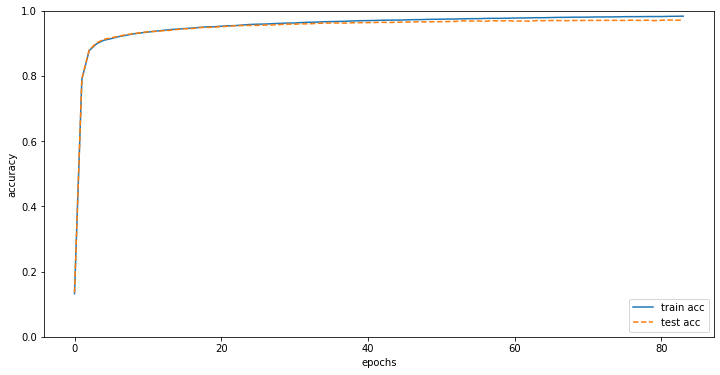

In [58]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

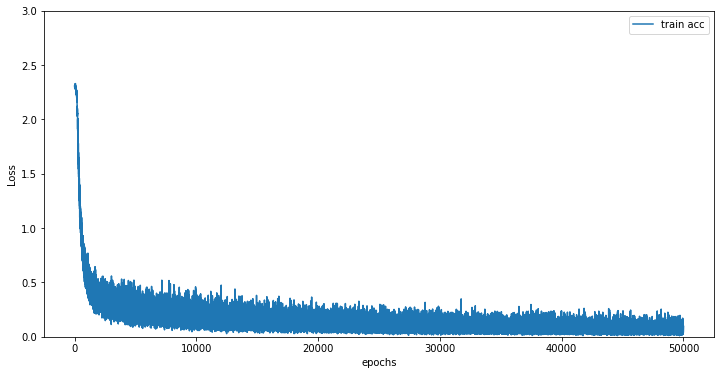

In [59]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()